In [1]:
import pandas as pd
import numpy as np

path = 'winequality-red.csv'
data = pd.read_csv(path, sep=',')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

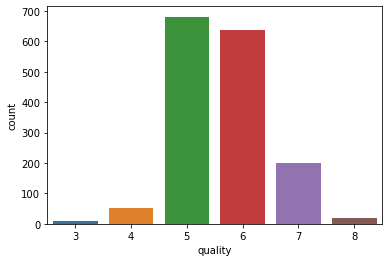

In [2]:
import seaborn as sns
ax = sns.countplot(data['quality'], label = "Count")

In [3]:

x = data.iloc[:,0:11].values
y = data.iloc[:,11:12].values

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[0:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

In [6]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size=0.15, random_state = 0)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=500, batch_size=35)

Epoch 1/500
39/39 [==============================] - 0s 4ms/step - loss: 1.8269 - accuracy: 0.0868 - val_loss: 1.7346 - val_accuracy: 0.1208
Epoch 2/500
39/39 [==============================] - 0s 997us/step - loss: 1.6294 - accuracy: 0.2141 - val_loss: 1.5155 - val_accuracy: 0.3917
Epoch 3/500
39/39 [==============================] - 0s 1ms/step - loss: 1.3960 - accuracy: 0.4474 - val_loss: 1.2837 - val_accuracy: 0.4625
Epoch 4/500
39/39 [==============================] - 0s 1ms/step - loss: 1.2277 - accuracy: 0.4886 - val_loss: 1.1675 - val_accuracy: 0.5167
Epoch 5/500
39/39 [==============================] - 0s 972us/step - loss: 1.1469 - accuracy: 0.5070 - val_loss: 1.1132 - val_accuracy: 0.5083
Epoch 6/500
39/39 [==============================] - 0s 895us/step - loss: 1.1019 - accuracy: 0.5195 - val_loss: 1.0765 - val_accuracy: 0.5333
Epoch 7/500
39/39 [==============================] - 0s 947us/step - loss: 1.0676 - accuracy: 0.5298 - val_loss: 1.0452 - val_accuracy: 0.5417
Epoch

39/39 [==============================] - 0s 920us/step - loss: 0.8534 - accuracy: 0.6416 - val_loss: 0.9246 - val_accuracy: 0.6292
Epoch 59/500
39/39 [==============================] - 0s 1ms/step - loss: 0.8533 - accuracy: 0.6387 - val_loss: 0.9228 - val_accuracy: 0.6458
Epoch 60/500
39/39 [==============================] - 0s 937us/step - loss: 0.8510 - accuracy: 0.6416 - val_loss: 0.9215 - val_accuracy: 0.6417
Epoch 61/500
39/39 [==============================] - 0s 972us/step - loss: 0.8506 - accuracy: 0.6380 - val_loss: 0.9293 - val_accuracy: 0.6250
Epoch 62/500
39/39 [==============================] - 0s 997us/step - loss: 0.8494 - accuracy: 0.6424 - val_loss: 0.9307 - val_accuracy: 0.6292
Epoch 63/500
39/39 [==============================] - 0s 1ms/step - loss: 0.8480 - accuracy: 0.6409 - val_loss: 0.9311 - val_accuracy: 0.6333
Epoch 64/500
39/39 [==============================] - 0s 1ms/step - loss: 0.8475 - accuracy: 0.6446 - val_loss: 0.9200 - val_accuracy: 0.6292
Epoch 65/50

39/39 [==============================] - 0s 946us/step - loss: 0.8110 - accuracy: 0.6512 - val_loss: 0.9352 - val_accuracy: 0.6208
Epoch 116/500
39/39 [==============================] - 0s 1ms/step - loss: 0.8115 - accuracy: 0.6497 - val_loss: 0.9387 - val_accuracy: 0.6000
Epoch 117/500
39/39 [==============================] - 0s 895us/step - loss: 0.8089 - accuracy: 0.6497 - val_loss: 0.9504 - val_accuracy: 0.6083
Epoch 118/500
39/39 [==============================] - 0s 972us/step - loss: 0.8072 - accuracy: 0.6571 - val_loss: 0.9326 - val_accuracy: 0.6333
Epoch 119/500
39/39 [==============================] - 0s 997us/step - loss: 0.8082 - accuracy: 0.6497 - val_loss: 0.9375 - val_accuracy: 0.6208
Epoch 120/500
39/39 [==============================] - 0s 869us/step - loss: 0.8079 - accuracy: 0.6527 - val_loss: 0.9327 - val_accuracy: 0.6208
Epoch 121/500
39/39 [==============================] - 0s 921us/step - loss: 0.8088 - accuracy: 0.6475 - val_loss: 0.9375 - val_accuracy: 0.6125
E

Epoch 172/500
39/39 [==============================] - 0s 1ms/step - loss: 0.7868 - accuracy: 0.6645 - val_loss: 0.9616 - val_accuracy: 0.6000
Epoch 173/500
39/39 [==============================] - 0s 1ms/step - loss: 0.7869 - accuracy: 0.6659 - val_loss: 0.9614 - val_accuracy: 0.6000
Epoch 174/500
39/39 [==============================] - 0s 1ms/step - loss: 0.7880 - accuracy: 0.6556 - val_loss: 0.9695 - val_accuracy: 0.6042
Epoch 175/500
39/39 [==============================] - 0s 997us/step - loss: 0.7860 - accuracy: 0.6623 - val_loss: 0.9641 - val_accuracy: 0.5833
Epoch 176/500
39/39 [==============================] - 0s 882us/step - loss: 0.7858 - accuracy: 0.6615 - val_loss: 0.9548 - val_accuracy: 0.6083
Epoch 177/500
39/39 [==============================] - 0s 997us/step - loss: 0.7835 - accuracy: 0.6593 - val_loss: 0.9655 - val_accuracy: 0.5958
Epoch 178/500
39/39 [==============================] - 0s 997us/step - loss: 0.7855 - accuracy: 0.6630 - val_loss: 0.9568 - val_accuracy

Epoch 229/500
39/39 [==============================] - 0s 971us/step - loss: 0.7697 - accuracy: 0.6667 - val_loss: 0.9848 - val_accuracy: 0.5958
Epoch 230/500
39/39 [==============================] - 0s 895us/step - loss: 0.7683 - accuracy: 0.6637 - val_loss: 0.9897 - val_accuracy: 0.6000
Epoch 231/500
39/39 [==============================] - 0s 946us/step - loss: 0.7690 - accuracy: 0.6652 - val_loss: 0.9841 - val_accuracy: 0.5875
Epoch 232/500
39/39 [==============================] - 0s 971us/step - loss: 0.7677 - accuracy: 0.6696 - val_loss: 0.9868 - val_accuracy: 0.5917
Epoch 233/500
39/39 [==============================] - 0s 920us/step - loss: 0.7673 - accuracy: 0.6681 - val_loss: 0.9821 - val_accuracy: 0.5875
Epoch 234/500
39/39 [==============================] - 0s 946us/step - loss: 0.7653 - accuracy: 0.6696 - val_loss: 0.9894 - val_accuracy: 0.6000
Epoch 235/500
39/39 [==============================] - 0s 921us/step - loss: 0.7661 - accuracy: 0.6726 - val_loss: 0.9859 - val_ac

Epoch 286/500
39/39 [==============================] - 0s 1ms/step - loss: 0.7516 - accuracy: 0.6740 - val_loss: 0.9950 - val_accuracy: 0.6167
Epoch 287/500
39/39 [==============================] - 0s 1ms/step - loss: 0.7495 - accuracy: 0.6762 - val_loss: 0.9964 - val_accuracy: 0.6083
Epoch 288/500
39/39 [==============================] - 0s 920us/step - loss: 0.7505 - accuracy: 0.6762 - val_loss: 0.9998 - val_accuracy: 0.6042
Epoch 289/500
39/39 [==============================] - 0s 972us/step - loss: 0.7502 - accuracy: 0.6792 - val_loss: 0.9998 - val_accuracy: 0.6125
Epoch 290/500
39/39 [==============================] - 0s 946us/step - loss: 0.7511 - accuracy: 0.6703 - val_loss: 1.0019 - val_accuracy: 0.6083
Epoch 291/500
39/39 [==============================] - 0s 946us/step - loss: 0.7503 - accuracy: 0.6733 - val_loss: 0.9935 - val_accuracy: 0.6083
Epoch 292/500
39/39 [==============================] - 0s 843us/step - loss: 0.7509 - accuracy: 0.6726 - val_loss: 1.0032 - val_accura

Epoch 343/500
39/39 [==============================] - 0s 1ms/step - loss: 0.7351 - accuracy: 0.6740 - val_loss: 1.0090 - val_accuracy: 0.6250
Epoch 344/500
39/39 [==============================] - 0s 895us/step - loss: 0.7355 - accuracy: 0.6740 - val_loss: 1.0118 - val_accuracy: 0.6250
Epoch 345/500
39/39 [==============================] - 0s 972us/step - loss: 0.7350 - accuracy: 0.6770 - val_loss: 1.0251 - val_accuracy: 0.5958
Epoch 346/500
39/39 [==============================] - 0s 1ms/step - loss: 0.7359 - accuracy: 0.6689 - val_loss: 1.0098 - val_accuracy: 0.6125
Epoch 347/500
39/39 [==============================] - 0s 997us/step - loss: 0.7355 - accuracy: 0.6784 - val_loss: 1.0105 - val_accuracy: 0.6167
Epoch 348/500
39/39 [==============================] - 0s 939us/step - loss: 0.7340 - accuracy: 0.6755 - val_loss: 1.0163 - val_accuracy: 0.6083
Epoch 349/500
39/39 [==============================] - 0s 997us/step - loss: 0.7328 - accuracy: 0.6821 - val_loss: 1.0193 - val_accura

Epoch 400/500
39/39 [==============================] - 0s 1ms/step - loss: 0.7231 - accuracy: 0.6902 - val_loss: 1.0370 - val_accuracy: 0.6125
Epoch 401/500
39/39 [==============================] - 0s 946us/step - loss: 0.7216 - accuracy: 0.6902 - val_loss: 1.0448 - val_accuracy: 0.6167
Epoch 402/500
39/39 [==============================] - 0s 1ms/step - loss: 0.7217 - accuracy: 0.6836 - val_loss: 1.0431 - val_accuracy: 0.6125
Epoch 403/500
39/39 [==============================] - 0s 895us/step - loss: 0.7219 - accuracy: 0.6851 - val_loss: 1.0537 - val_accuracy: 0.6042
Epoch 404/500
39/39 [==============================] - 0s 997us/step - loss: 0.7217 - accuracy: 0.6851 - val_loss: 1.0423 - val_accuracy: 0.6125
Epoch 405/500
39/39 [==============================] - 0s 921us/step - loss: 0.7219 - accuracy: 0.6836 - val_loss: 1.0428 - val_accuracy: 0.6167
Epoch 406/500
39/39 [==============================] - 0s 946us/step - loss: 0.7218 - accuracy: 0.6865 - val_loss: 1.0507 - val_accura

Epoch 457/500
39/39 [==============================] - 0s 946us/step - loss: 0.7105 - accuracy: 0.6924 - val_loss: 1.0807 - val_accuracy: 0.6083
Epoch 458/500
39/39 [==============================] - 0s 1ms/step - loss: 0.7111 - accuracy: 0.6976 - val_loss: 1.0727 - val_accuracy: 0.6125
Epoch 459/500
39/39 [==============================] - 0s 972us/step - loss: 0.7105 - accuracy: 0.6954 - val_loss: 1.0946 - val_accuracy: 0.5958
Epoch 460/500
39/39 [==============================] - 0s 1ms/step - loss: 0.7120 - accuracy: 0.6932 - val_loss: 1.0846 - val_accuracy: 0.6000
Epoch 461/500
39/39 [==============================] - 0s 869us/step - loss: 0.7124 - accuracy: 0.6887 - val_loss: 1.0671 - val_accuracy: 0.6167
Epoch 462/500
39/39 [==============================] - 0s 921us/step - loss: 0.7104 - accuracy: 0.6917 - val_loss: 1.0851 - val_accuracy: 0.6250
Epoch 463/500
39/39 [==============================] - 0s 895us/step - loss: 0.7109 - accuracy: 0.7005 - val_loss: 1.0834 - val_accura

In [11]:
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         7
           2       0.64      0.70      0.67        96
           3       0.65      0.58      0.61       110
           4       0.36      0.59      0.45        22
           5       0.00      0.00      0.00         3

    accuracy                           0.60       240
   macro avg       0.28      0.31      0.29       240
weighted avg       0.59      0.60      0.59       240

[[ 0  0  1  1  0  0]
 [ 0  0  6  1  0  0]
 [ 0  1 67 25  3  0]
 [ 0  0 28 64 18  0]
 [ 0  0  2  7 13  0]
 [ 0  0  0  1  2  0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


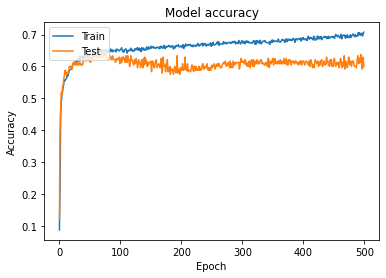

In [13]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
score = model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 623us/step - loss: 1.1123 - accuracy: 0.6000


In [16]:
from sklearn import metrics
print("MAPE",metrics.mean_squared_error(y_test_class,y_pred_class))
print("RMES",np.sqrt(metrics.mean_squared_error(y_test_class, y_pred_class)))

MAPE 0.5333333333333333
RMES 0.7302967433402214
